In [ ]:
!pip install --upgrade kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [15]:
!kaggle competitions download -c dog-breed-identification

 97% 673M/691M [00:16<00:00, 24.2MB/s]
100% 691M/691M [00:16<00:00, 44.4MB/s]


In [ ]:
!unzip dog-breed-identification.zip

In [ ]:
!unzip sample_submission.csv.zip

In [1]:
import pandas as pd

label_text=pd.read_csv('labels.csv')
label_text.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [3]:
label_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [5]:
label_text["breed"].nunique() #number of unique, unique : unique labels name

120

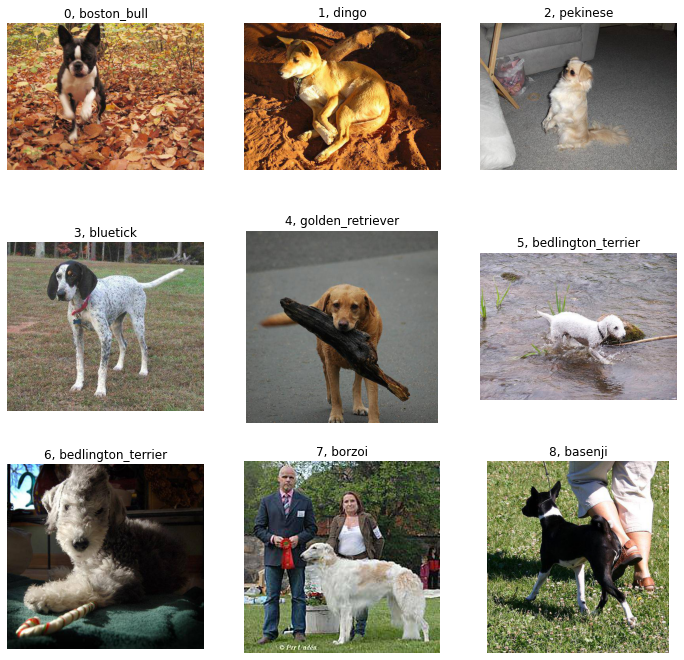

In [31]:
import PIL.Image as Image
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

for c in range(9):
    imgid=label_text.loc[c,'id']
    plt.subplot(3,3,c+1)
    plt.imshow(plt.imread("./train/"+imgid+".jpg"))
    plt.title(str(c)+", "+label_text.loc[c,"breed"])
    plt.axis('off')
plt.show()

In [2]:
import tensorflow as tf
import numpy as np

In [11]:
mobilev2=tf.keras.applications.MobileNetV2()

In [12]:
for layer in mobilev2.layers[:-1]:
    layer.trainable=True
for layer in mobilev2.layers[:-1]:
    #print(layer.__dict__)
    if 'kernel' in layer.__dict__:
        kernel_shape=np.array(layer.get_weights()).shape
        layer.set_weights(tf.random.normal(kernel_shape,0,1))

In [44]:
mobilenetv2.layers[4].__dict__

{'_activity_regularizer': None,
 '_auto_track_sub_layers': True,
 '_autocast': True,
 '_build_input_shape': None,
 '_callable_losses': [],
 '_compute_dtype_object': tf.float32,
 '_default_training_arg': None,
 '_dtype_defaulted_to_floatx': True,
 '_dtype_policy': <Policy "float32", loss_scale=None>,
 '_dynamic': False,
 '_expects_mask_arg': False,
 '_expects_training_arg': False,
 '_inbound_nodes': [<tensorflow.python.keras.engine.node.Node at 0x7fb370e23cf8>],
 '_initial_weights': None,
 '_input_spec': None,
 '_layers': [],
 '_losses': [],
 '_metrics': [],
 '_metrics_lock': <unlocked _thread.lock object at 0x7fb37736ee18>,
 '_name': 'Conv1_relu',
 '_non_trainable_weights': [],
 '_obj_reference_counts_dict': ObjectIdentityDictionary({<_ObjectIdentityWrapper wrapping True>: 1, <_ObjectIdentityWrapper wrapping array(6., dtype=float32)>: 1, <_ObjectIdentityWrapper wrapping array(0., dtype=float32)>: 1, <_ObjectIdentityWrapper wrapping array(0., dtype=float32)>: 1}),
 '_outbound_nodes': [<

In [3]:
import cv2

train_X=[]

for i in range(len(label_text)//3):
    img=cv2.imread('./train/'+label_text['id'][i]+'.jpg')
    img=cv2.resize(img,dsize=(224,224))
    img=img/255.0
    train_X.append(img)

train_X=np.array(train_X)

In [4]:
train_X.shape

(3407, 224, 224, 3)

In [5]:
unique_Y=label_text['breed'].unique().tolist()
train_Y=[unique_Y.index(breed) for breed in label_text['breed']]
train_Y=np.array(train_Y[:len(label_text)//3])

In [6]:
train_Y.shape

(3407,)

In [16]:
x=mobilev2.layers[-2].output
predictions=tf.keras.layers.Dense(120,activation='softmax')(x)
model=tf.keras.Model(inputs=mobilev2.input,outputs=predictions)
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#history=model.fit(train_X,train_Y,epochs=10,validation_split=0.25,batch_size=32)

Epoch 1/10


In [7]:
mobilev2=tf.keras.applications.MobileNetV2()
x=mobilev2.layers[-2].output
predictions=tf.keras.layers.Dense(120,activation='softmax')(x)
model=tf.keras.Model(inputs=mobilev2.input,outputs=predictions)

for layer in model.layers[:-20]:
    layer.trainable=False
for layer in model.layers[-20:]:
    layer.trainable=True

model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(train_X,train_Y,epochs=10,validation_split=0.25,batch_size=32)

Epoch 1/10
80/80 [==============================] - 132s 2s/step - loss: 4.3596 - accuracy: 0.1018 - val_loss: 3.3874 - val_accuracy: 0.2477
Epoch 2/10
80/80 [==============================] - 132s 2s/step - loss: 2.6893 - accuracy: 0.4391 - val_loss: 2.4790 - val_accuracy: 0.3721
Epoch 3/10
80/80 [==============================] - 129s 2s/step - loss: 1.8169 - accuracy: 0.6556 - val_loss: 2.0903 - val_accuracy: 0.4507
Epoch 4/10
80/80 [==============================] - 130s 2s/step - loss: 1.3295 - accuracy: 0.7820 - val_loss: 1.9120 - val_accuracy: 0.4836
Epoch 5/10
80/80 [==============================] - 132s 2s/step - loss: 1.0251 - accuracy: 0.8548 - val_loss: 1.8316 - val_accuracy: 0.4918
Epoch 6/10
80/80 [==============================] - 131s 2s/step - loss: 0.8219 - accuracy: 0.8982 - val_loss: 1.7846 - val_accuracy: 0.5047
Epoch 7/10
80/80 [==============================] - 130s 2s/step - loss: 0.6571 - accuracy: 0.9354 - val_loss: 1.7346 - val_accuracy: 0.5117
Epoch 8/10
80

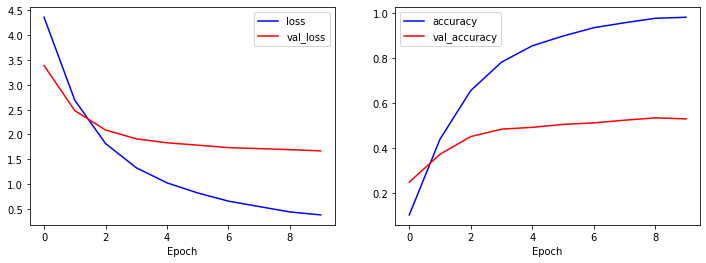

In [10]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b-',label='loss')
plt.plot(history.history['val_loss'],'r-',label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b-',label='accuracy')
plt.plot(history.history['val_accuracy'],'r-',label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()